In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score , precision_score, recall_score, f1_score , ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import zipfile
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier



In [2]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 92% 91.0M/98.8M [00:01<00:00, 70.8MB/s]
100% 98.8M/98.8M [00:01<00:00, 75.0MB/s]


In [3]:
#Unzip the dataset
with zipfile.ZipFile('heartbeat.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [71]:
df = pd.read_csv('/content/dataset_directory/mitbih_train.csv', header=None)
df_test = pd.read_csv('/content/dataset_directory/mitbih_test.csv', header=None)

In [20]:
df.shape

(87554, 188)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Density'>

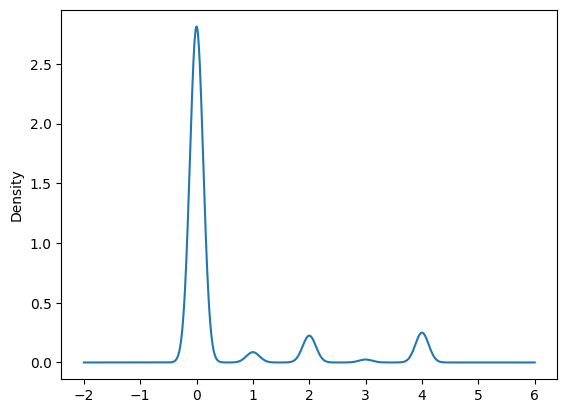

In [24]:
df[187].plot.density()

In [30]:
unique_values = np.unique(df[187])
unique_values

array([0., 1., 2., 3., 4.])

<ipython-input-31-ee3537b2de69>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df[187], palette='tab10')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you wil

<Axes: xlabel='187', ylabel='count'>

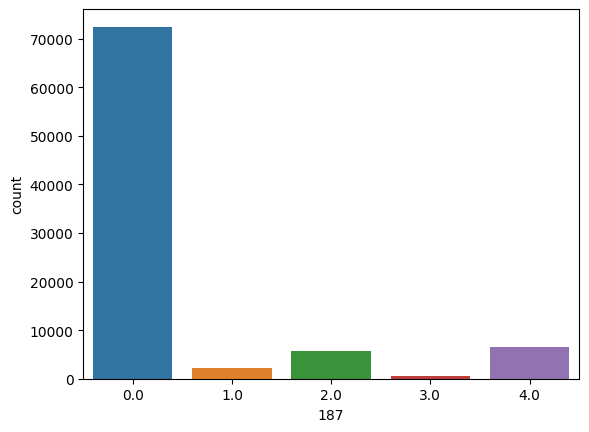

In [31]:
sns.countplot(x =df[187], palette='tab10')

<ipython-input-32-3506e400cab1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =df_test[187], palette='tab10')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, yo

<Axes: xlabel='187', ylabel='count'>

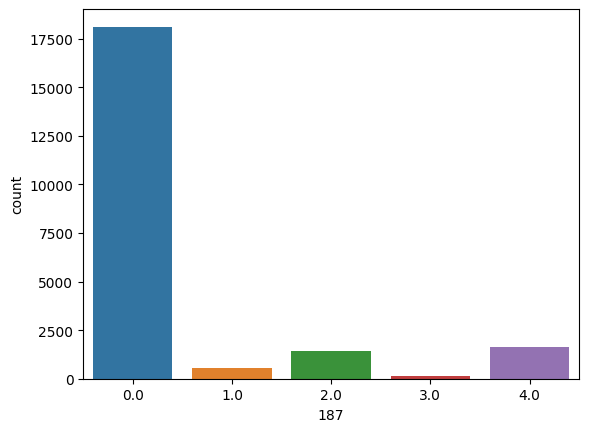

In [32]:
sns.countplot(x =df_test[187], palette='tab10')

In [33]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [34]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [72]:
X_train= df.drop(187, axis=1)
y_train = df[187]

In [73]:
X_test= df_test.drop(187, axis=1)
y_test = df_test[187]

In [41]:
# smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [74]:
y_test.value_counts()

,count
187,
0.0,18118
4.0,1608
2.0,1448
1.0,556
3.0,162


In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
value_counts = pd.Series(y_test_binary).value_counts()
value_counts

,count
0,18118
1,3774


In [77]:
y_train_binary = np.where(y_train != 0, 1, 0)
y_test_binary = np.where(y_test != 0, 1, 0)


<ipython-input-78-20849178aafb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_binary, palette='tab10')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='count'>

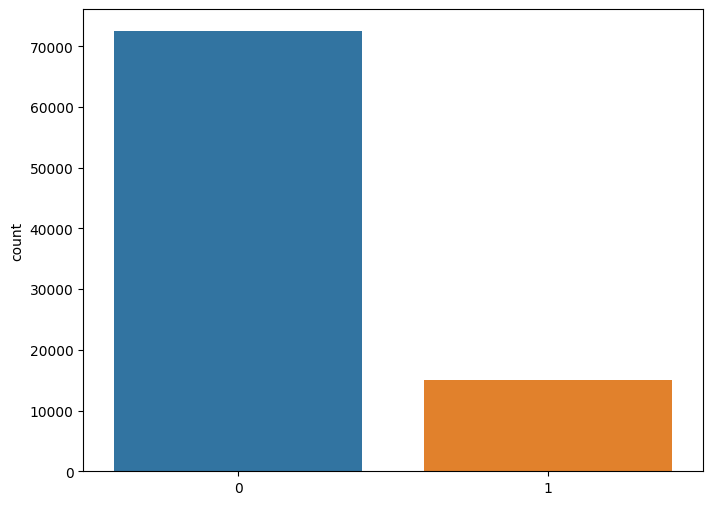

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_binary, palette='tab10')


In [98]:
X_train_new = df.iloc[:, :140]
X_test_new = df_test.iloc[:, :140]

In [99]:
X_test_new.shape

(21892, 140)

In [79]:
lr = LogisticRegression(max_iter=1000 , class_weight='balanced')
lr.fit(X_train, y_train_binary)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [80]:
y_pred = lr.predict(X_test)

In [100]:
clf = XGBClassifier()
clf = clf.fit(X_train_new, y_train_binary)
y_pred = clf.predict(X_test_new)

In [86]:
pca = PCA(n_components=2)  # We want to reduce to 2 dimensions
X_pca = pca.fit_transform(X_train)


In [88]:
X_test_pca = pca.fit_transform(X_test)

In [106]:
df[140].unique()

array([0.        , 0.04178273, 0.19631901, ..., 0.39237669, 0.83966243,
       0.1920792 ])

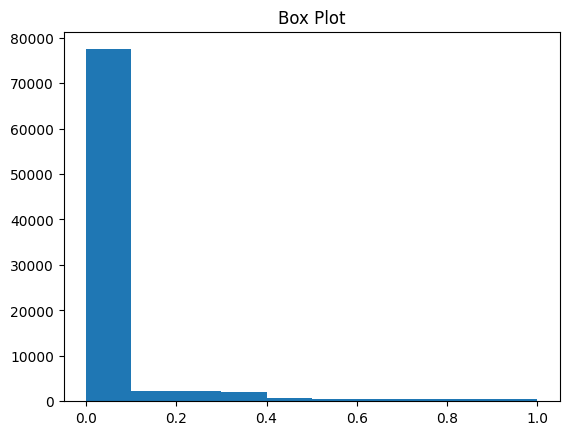

In [107]:
plt.hist(df[140])
plt.title('Box Plot')
plt.show()

In [108]:
X_test.shape

(21892, 187)

<Axes: >

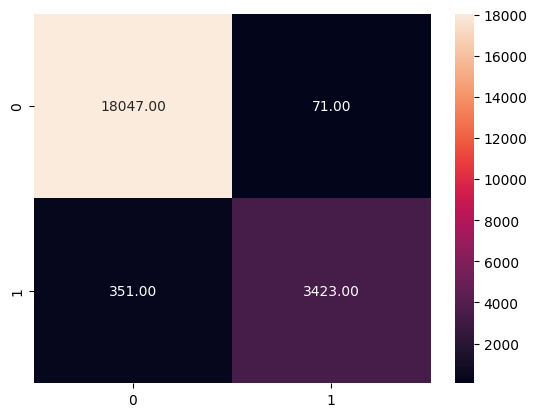

In [104]:
sns.heatmap(confusion_matrix(y_test_binary, y_pred) ,annot=True, fmt='.2f')

In [105]:
print(classification_report(y_test_binary, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18118
           1       0.98      0.91      0.94      3774

    accuracy                           0.98     21892
   macro avg       0.98      0.95      0.97     21892
weighted avg       0.98      0.98      0.98     21892



In [128]:
y_train_adjusted = y_train_multi - 1
y_test_adjusted = y_test_multi - 1


In [125]:
y_train_adjusted.value_counts()

,count
187,
3.0,6431
1.0,5788
0.0,2223
2.0,641


In [115]:
multi_train =  df[df[187] != 0]
y_train_multi = multi_train[187]
x_train_multi= multi_train.drop(187,axis =1)

In [117]:
multi_test =  df_test[df_test[187] != 0]
y_test_multi = multi_test[187]
x_test_multi= multi_test.drop(187,axis =1)

In [153]:
clf = XGBClassifier(max_depth=9 ,random_state=42)
clf.fit(x_train_multi, y_train_adjusted)
y_pred = clf.predict(x_test_multi)

<Axes: >

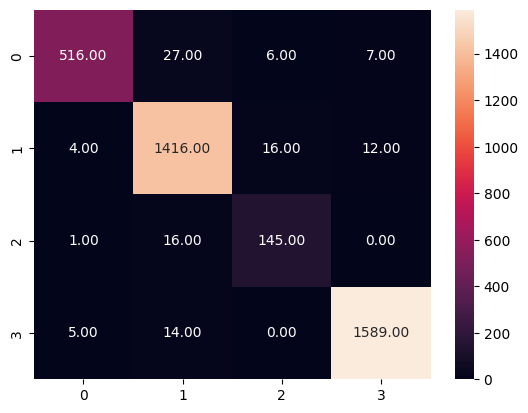

In [154]:
sns.heatmap(confusion_matrix(y_test_adjusted, y_pred) ,annot=True, fmt='.2f')

In [155]:
print(classification_report(y_test_adjusted, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       556
         1.0       0.96      0.98      0.97      1448
         2.0       0.87      0.90      0.88       162
         3.0       0.99      0.99      0.99      1608

    accuracy                           0.97      3774
   macro avg       0.95      0.95      0.95      3774
weighted avg       0.97      0.97      0.97      3774



## Using Over Sampling

## Normal & Abnormal

In [156]:
abnormal = pd.read_csv('/content/dataset_directory/ptbdb_abnormal.csv',header=None)
normal = pd.read_csv('/content/dataset_directory/ptbdb_normal.csv',header=None)

In [157]:
abnormal.shape , normal.shape

((10506, 188), (4046, 188))

In [158]:
Data = pd.concat([abnormal, normal])

In [159]:
print(Data[187].value_counts())

187
1.0    10506
0.0     4046
Name: count, dtype: int64


In [160]:
y_abnormal = pd.DataFrame(np.ones(abnormal.shape[0]))
y_normal = pd.DataFrame(np.zeros(normal.shape[0]))

# merging the original dataframe
x = pd.concat([abnormal, normal], sort=True)
y = pd.concat([y_abnormal, y_normal], sort=True)

In [161]:
columns_to_drop = [i for i in range(70, 188)]
x = x.drop(x.columns[columns_to_drop], axis=1)

In [162]:
X_train ,  X_test , y_train , y_test = train_test_split(x , y , test_size=0.2,shuffle=True,random_state = 44)

In [163]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [164]:
y_pred = rf.predict(X_test)

<Axes: >

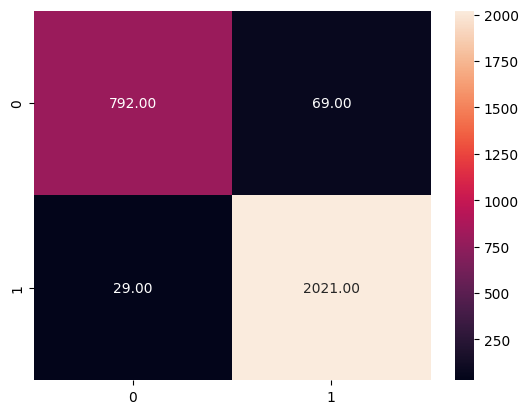

In [165]:
sns.heatmap(confusion_matrix(y_test, y_pred) ,annot=True, fmt='.2f')

In [166]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       861
         1.0       0.97      0.99      0.98      2050

    accuracy                           0.97      2911
   macro avg       0.97      0.95      0.96      2911
weighted avg       0.97      0.97      0.97      2911

